In [5]:
import matplotlib.pyplot as plt

from vvsa.products.product_factory import get_product

# A Glimpse of the ETF's Performance
Let's start simply by getting a glimpse of the ETF's performance (measured by its adjusted closed) in a plot.
We'll be using the accumulating version of the ETF.

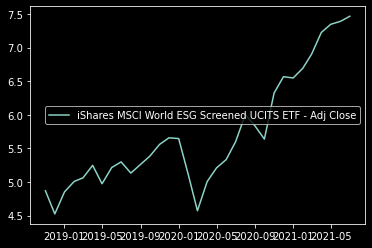

In [6]:
SDWD = get_product("SDWD")

SDWD_adj_close = SDWD.get_adj_close()

fig, ax = plt.subplots()

ax.plot(
    SDWD_adj_close.series,
    label=f"{SDWD.name} - {SDWD_adj_close.name}",
)
ax.legend()

plt.show()


Let's see this graph with a base of 1000, to get a better sense of the relative performance.

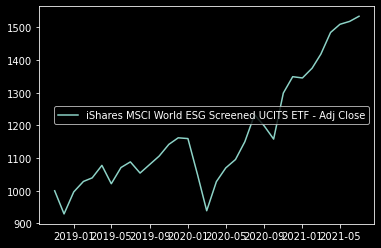

In [7]:
SDWD_adj_close_1000 = SDWD.get_adj_close(base=1000)

fig, ax = plt.subplots()

ax.plot(
    SDWD_adj_close_1000.series,
    label=f"{SDWD.name} - {SDWD_adj_close_1000.name}",
)
ax.legend()


Let's compare the ETF's performance with that of its underlying index, to get a quick glimpse of the ETF's tracking error. 
First, we need to know when our data for both the ETF and the underlying index start.

In [8]:
MSCIWES = get_product("MSCIWES")

MSCIWES_net = MSCIWES.get_net()

print(f"Our ETF data starts at: {SDWD_adj_close.series.first_valid_index().date()}")
print(f"Our Index data starts at: {MSCIWES_net.series.first_valid_index().date()}")

Our ETF data starts at: 2018-11-01
Our Index data starts at: 2012-05-31


So our analysis will have to start from 2018-11-01.
To make sure that we make a correct comparison between the two time series, let's see the frequency with which we have data on the underlying index.

In [9]:
print(MSCIWES_net.series.index)

DatetimeIndex(['2012-05-31', '2012-06-29', '2012-07-31', '2012-08-31',
               '2012-09-28', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28',
               ...
               '2020-09-30', '2020-10-30', '2020-11-30', '2020-12-31',
               '2021-01-29', '2021-02-26', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30'],
              dtype='datetime64[ns]', name='Date', length=110, freq=None)


We only have monthly data, for end-of-months. So we should trim the Index's data not from 2018-11-01, but from the last day of the previous month: 2018-10-31. 

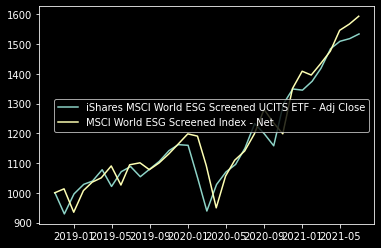

In [10]:
MSCIWES_net_1000_2018 = MSCIWES.get_net(base=1000, start_date="2018-10-31")

fig, ax = plt.subplots()

ax.plot(
    SDWD_adj_close_1000.series,
    label=f"{SDWD.name} - {SDWD_adj_close_1000.name}",
)
ax.plot(
    MSCIWES_net_1000_2018.series,
    label=f"{MSCIWES.name} - {MSCIWES_net_1000_2018.name}",
)

ax.legend()

plt.show()

Here we notice something odd: there's quite a substantial difference between the two series, which is not expected from an ETF with a low tracking error. This may indicate that a piece of our data - either the ETF's or the Index's series - is not 100% accurate.

Let's investigate a bit. First, we pulled data on the ETF's performance from iShares, to compare with the data from Yahoo.

In [11]:
SDWD_adj_close_ishares = SDWD.get_adj_close(source="iShares")

print(f"Our ETF data from iShares starts at: {SDWD_adj_close_ishares.series.first_valid_index().date()}")
print(SDWD_adj_close_ishares.series.index)

Our ETF data from iShares starts at: 2018-10-19
DatetimeIndex(['2018-08-31', '2018-10-19', '2018-10-22', '2018-10-23',
               '2018-10-24', '2018-10-25', '2018-10-26', '2018-10-29',
               '2018-10-30', '2018-10-31',
               ...
               '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-05',
               '2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09',
               '2021-07-12', '2021-07-13'],
              dtype='datetime64[ns]', name='As Of', length=694, freq=None)


Again, the time-span covered by Yahoo is lower than the one covered by iShares, so we'll compare the data starting from 2018-11-01, our first datapoint from Yahoo.

Also, it seems that we were able to retrieve daily data from iShares. But since the data from Yahoo is only monthly, we'll convert the iShares data to monthly to make the comparison easier to read. 

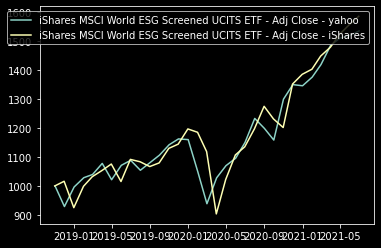

In [12]:
SDWD_adj_close_1000_ishares = SDWD.get_adj_close(base=1000, start_date="2018-11-01", source="iShares", resample_rule="M", resampling_method="first")

fig, ax = plt.subplots()

ax.plot(
    SDWD_adj_close_1000.series,
    label=f"{SDWD.name} - {SDWD_adj_close_1000.name} - {SDWD_adj_close_1000.source}",
)
ax.plot(
    SDWD_adj_close_1000_ishares.series,
    label=f"{SDWD.name} - {SDWD_adj_close_1000_ishares.name} - {SDWD_adj_close_1000_ishares.source}",
)

ax.legend()

plt.show()

Again we see a significant difference between the two series, although they now refer to the performance of the same product - the ETF.

Comparing this graph with the previous, it looks like the series got from iShares will be closer to the performance series of the underlying index. Let's check.

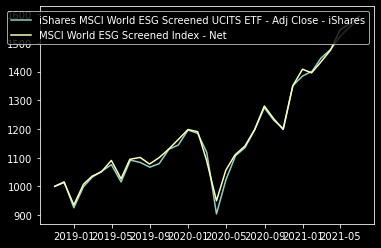

In [13]:
fig, ax = plt.subplots()

ax.plot(
    SDWD_adj_close_1000_ishares.series,
    label=f"{SDWD.name} - {SDWD_adj_close_1000_ishares.name} - {SDWD_adj_close_1000_ishares.source}",
)
ax.plot(
    MSCIWES_net_1000_2018.series,
    label=f"{MSCIWES.name} - {MSCIWES_net_1000_2018.name}",
)

ax.legend()

plt.show()

Indeed, this is much closer to what we would expect when overlaying an ETF's with its underlying index - some difference in performance, but small (which we call the tracking error).

From now on, we'll use the series from iShares for the ETF's performance.

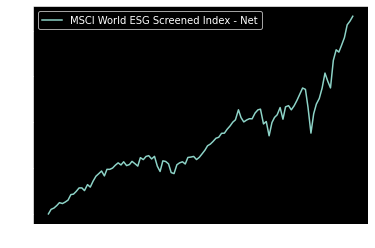

In [11]:
fig, ax = plt.subplots()

ax.plot(
    MSCIWES_net.series,
    label=f"{MSCIWES.name} - {MSCIWES_net.name}",
)

ax.legend()

plt.show()

In [12]:
MSCIW = get_product("MSCIW")

MSCIW_net = MSCIW.get_net()

print(f"Our MSCI World ESG Screened Index data starts at: {MSCIWES_net.series.first_valid_index().date()}")
print(f"Our MSCI World Index data starts at: {MSCIW_net.series.first_valid_index().date()}")

Our MSCI World ESG Screened Index data starts at: 2012-05-31
Our MSCI World Index data starts at: 1969-12-31


In [13]:
print(MSCIW_net.series.index)

DatetimeIndex(['1969-12-31', '1970-01-30', '1970-02-27', '1970-03-31',
               '1970-04-30', '1970-05-29', '1970-06-30', '1970-07-31',
               '1970-08-31', '1970-09-30',
               ...
               '2020-09-30', '2020-10-30', '2020-11-30', '2020-12-31',
               '2021-01-29', '2021-02-26', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30'],
              dtype='datetime64[ns]', name='Date', length=619, freq=None)


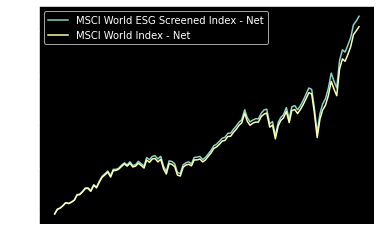

In [14]:
MSCIW_net_1000_2012 = MSCIW.get_net(base=1000, start_date="2012-05-31")
MSCIWES_net_1000 = MSCIWES.get_net(base=1000)

fig, ax = plt.subplots()

ax.plot(
    MSCIWES_net_1000.series,
    label=f"{MSCIWES.name} - {MSCIWES_net_1000.name}",
)
ax.plot(
    MSCIW_net_1000_2012.series,
    label=f"{MSCIW.name} - {MSCIW_net_1000_2012.name}",
)

ax.legend()

plt.show()

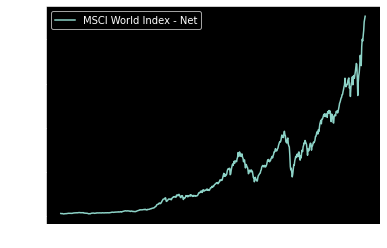

In [15]:
MSCIW_net_1000 = MSCIW.get_net(base=1000)

fig, ax = plt.subplots()

ax.plot(
    MSCIW_net_1000.series,
    label=f"{MSCIW.name} - {MSCIW_net_1000.name}",
)

ax.legend()

plt.show()

[Draft:] But we must remember that the index's performance does not take inflation into account. An investor's real return will be significantly less.

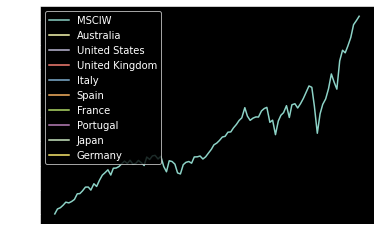

In [16]:
from vvsa.economic_indicators.cpi import CPI as CPI_Class

MSCIW_net_1000_1971_Y = MSCIW.get_net(
    base=1000,
    start_date="1971-01-01",
    resample_rule="AS",
    resampling_method="first",
)

fig, ax = plt.subplots()

ax.plot(
    MSCIW_net_1000_1971_Y.series,
    label=f"{MSCIW.name} - {MSCIW_net_1000_1971_Y.name}",
)

CPI = CPI_Class()

for country in CPI.data:
    country_cpi = CPI.data[country].alter_time_series(base=100)

    s = MSCIW_net_1000_1971_Y.series / country_cpi.series * 100

    ax.plot(
        s,
        label=f"{CPI.name} - {country}",
    )

ax.legend()

plt.show()